# Quantum Entanglement (Bell-Test)

The Bell test demonstrates that measurements of an entangled state cannot be explained by any local hidden variable theory, and that there must be correlations that are beyond classical.

In [1]:
from qiskit import *

In [2]:
# creating two qubits (quantum) register.
qr = QuantumRegister(2)

# creating two bit (classical) register.
cr = ClassicalRegister(2)

In [3]:
# creating a quantum circuit.
circuit = QuantumCircuit(qr, cr)

In [4]:
# draws out the current circuit.
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
# applying HADAMARD gate on qubit1 to create Superposition.
circuit.h(qr[0])

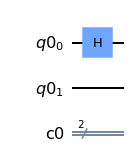

In [6]:
circuit.draw(output='mpl')

In [7]:
# applying a CNOT gate on qubit1 and qubit2 to create Entanglement.
circuit.cx(qr[0], qr[1])

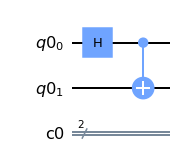

In [8]:
circuit.draw(output='mpl')

In [9]:
# applying MEASURE gate to get the results from quantum to classical registers.
circuit.measure(qr, cr)

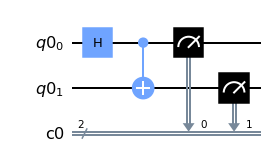

In [10]:
circuit.draw(output='mpl')

Before sending job to a real Quantum Computer, we'll run it on a Simulator.

In [11]:
simulator = Aer.get_backend('qasm_simulator')

In [12]:
result = execute(circuit, backend=simulator, shots=2000).result()

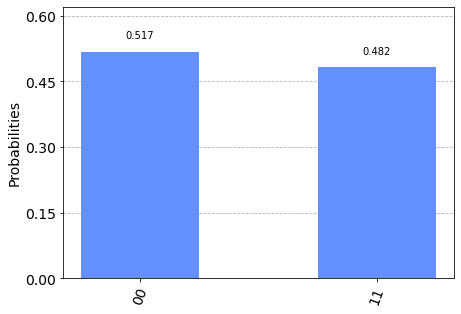

In [13]:
# using plot_histogram to display result.

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Result shows that only 00 and 11 states are possible since

Now we'll execute the circuit on a real Quantum Computer.

In [14]:
# to save IBMQ credential on local machine.
#IBMQ.save_account('')       # insert API token and run once

In [15]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# selecting provider and actual hardware to execute job (circuit).

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_belem')

In [17]:
job = execute(circuit, backend=qcomp, shots=2000)

In [18]:
# to get the status of the job.

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


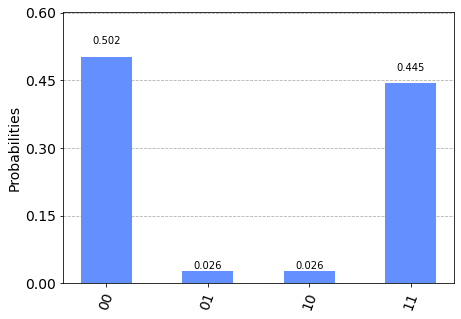

In [19]:
# to get display result after execution.

result = job.result()
plot_histogram(result.get_counts(circuit))